In [4]:
%pip install seaborn matplotlib

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.6 kB ? eta -:--:--
     ------------------------- ----------- 71.7/104.6 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 104.6/104.6 kB 1.2 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl (8.1 MB)
   ---------------------------------------- 0.0/223.0 kB ? eta -:--:--
   -------------------------------------- - 215.0/223.0 kB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 223.0/223.0 kB 4.6 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   -----


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../datasets/titanic3.csv', sep=';')

display(df.head())


🔍 Visão geral do dataset:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


🕳️ Dados faltantes por coluna:


,coluna,faltantes,%
0,pclass,1,0.076336
1,survived,1,0.076336
2,name,1,0.076336
3,sex,1,0.076336
4,age,264,20.152672
5,sibsp,1,0.076336
6,parch,1,0.076336
7,ticket,1,0.076336
8,fare,2,0.152672
9,cabin,1015,77.480916


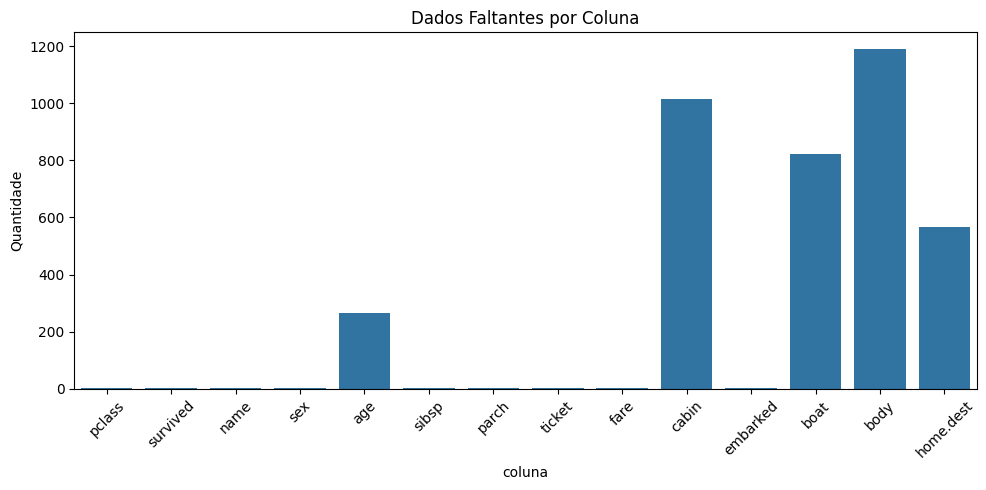

In [8]:
# Contar valores faltantes por coluna
missing = df.isnull().sum().reset_index(name='faltantes')
missing.columns = ['coluna', 'faltantes']
missing['%'] = (missing['faltantes'] / len(df)) * 100

print("🕳️ Dados faltantes por coluna:")
display(missing)

# Gráfico de barras dos faltantes
plt.figure(figsize=(10, 5))
sns.barplot(data=missing, x='coluna', y='faltantes')
plt.xticks(rotation=45)
plt.title("Dados Faltantes por Coluna")
plt.ylabel("Quantidade")
plt.tight_layout()
plt.show()


📈 Visualização de possíveis outliers em 'age' e 'fare':


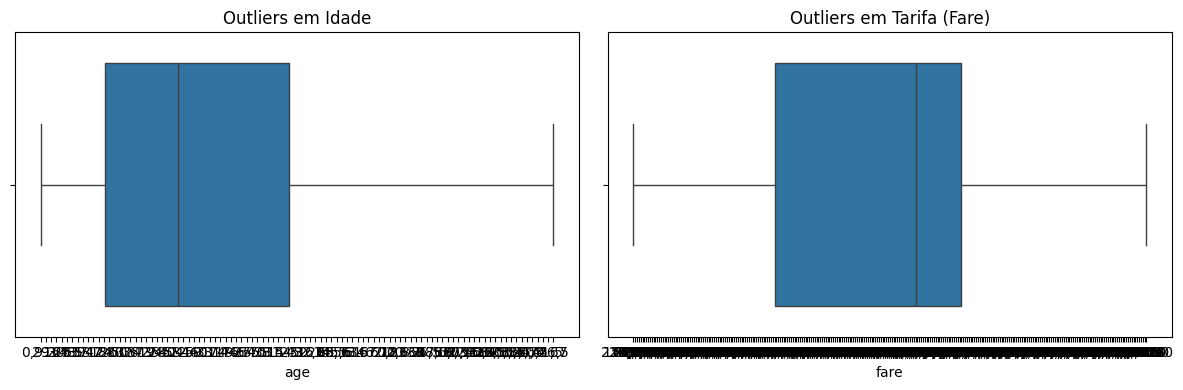

In [9]:
print("📈 Visualização de possíveis outliers em 'age' e 'fare':")

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x=df['age'], ax=ax[0])
ax[0].set_title("Outliers em Idade")

sns.boxplot(x=df['fare'], ax=ax[1])
ax[1].set_title("Outliers em Tarifa (Fare)")

plt.tight_layout()
plt.show()


In [10]:
sobreviventes = df[df['survived'] == 1]
falecidos = df[df['survived'] == 0]

print("💡 Viés de Sobrevivência")
print(f"- Total de passageiros: {len(df)}")
print(f"- Sobreviventes: {len(sobreviventes)}")
print(f"- Falecidos: {len(falecidos)}\n")

print("⚠️ Se analisarmos apenas os sobreviventes (ex: idade média, tarifa), podemos tirar conclusões enviesadas, ignorando o grupo que não sobreviveu.")


💡 Viés de Sobrevivência
- Total de passageiros: 1310
- Sobreviventes: 500
- Falecidos: 809

⚠️ Se analisarmos apenas os sobreviventes (ex: idade média, tarifa), podemos tirar conclusões enviesadas, ignorando o grupo que não sobreviveu.
